<a href="https://colab.research.google.com/github/tonysoux/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Fri Aug  8 19:13:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.6.0+cu124


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

augment the data (transfer learning)
change the optimizer (learning rate...)
change the architecture of the model: more layers/units
augment the number of epochs

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [3]:
# 1. Get data

import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Did not find {image_path} directory, creating one...")
  image_path.mkdir(parents= True ,exist_ok=True)

  with open(data_path/ "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Dowloading zip file")
    f.write(request.content)

  with zipfile.ZipFile(data_path/ "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Extracting the zip file")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Dowloading zip file
Extracting the zip file


In [4]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
walk_through_dir("data")

There are 1 directories and 1 images in 'data'.
There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.


In [5]:
# Setup train and testing paths
training_path="data/pizza_steak_sushi/train"
testing_path="data/pizza_steak_sushi/test"

[PosixPath('data/pizza_steak_sushi/train/pizza/3269634.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/2026009.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/3860002.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/2451169.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/2154394.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/12301.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/2924941.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/702165.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/1660415.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/300869.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/3196721.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/3530210.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/1572608.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/2428085.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/2382016.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/2885050.jpg'), PosixPath('data/pizza_steak

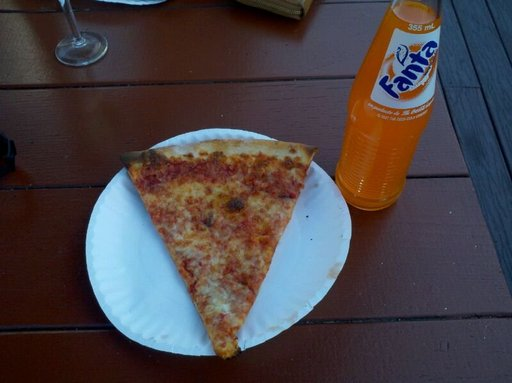

In [6]:
# Visualize an image
import random
from PIL import Image

random.seed(42)

image_path_list=list(image_path.glob("*/*/*.jpg"))
print(image_path_list)
random_image_path=random.choice(image_path_list)
image_class=random_image_path.parent.stem

img=Image.open(random_image_path)
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

In [ ]:
import cv2

all_image_list=[]
all_label_list=[]
for dir in os.listdir(training_path):
  print(f"Processing {dir} files")
  for image_path in os.listdir(os.path.join(training_path, dir)):
    #print(image_path)
    image=cv2.imread(os.path.join(training_path, dir, image_path))
    image_tensor=torch.from_numpy(image)
    print(image.shape)
    #print(os.path.join(training_path, dir, image_path))
    #print(image)
    all_image_list.append(image_tensor)
    all_label_list.append(dir)

all_image_tensor=torch.stack(all_image_list, dim = 0)
print(all_image_tensor.shape)





 # sorted_file=[f for file in sorted(os.path.join(training_path, ))]
#print(len(sorted_file))

(np.float64(-0.5), np.float64(511.5), np.float64(382.5), np.float64(-0.5))

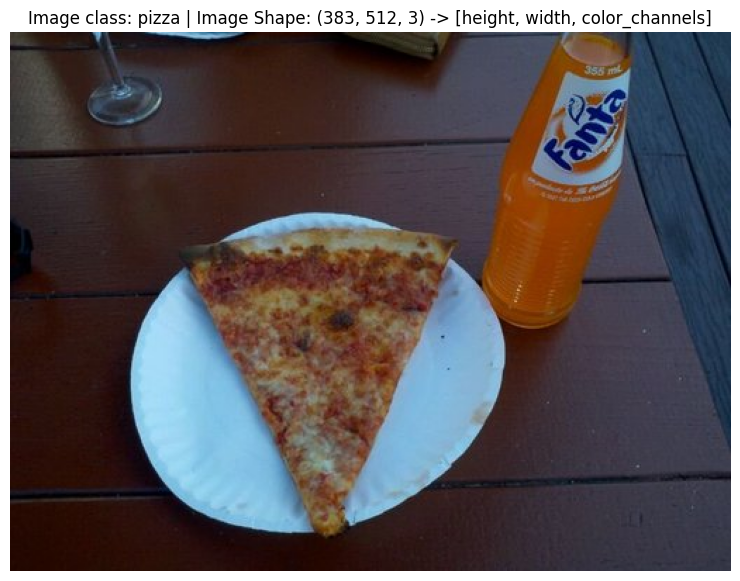

In [7]:
# Do the image visualization with matplotlib
import matplotlib.pyplot as plt
import numpy as np

np_image=np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(np_image)
plt.title(f"Image class: {image_class} | Image Shape: {np_image.shape} -> [height, width, color_channels]")
plt.axis(False)

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [8]:
# 3.1 Transforming data with torchvision.transforms
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms



In [9]:
# Write transform for turning images into tensors
data_transform=transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.transforms.ToTensor()
])

torch.Size([64, 64, 3])
torch.Size([64, 64, 3])
torch.Size([64, 64, 3])


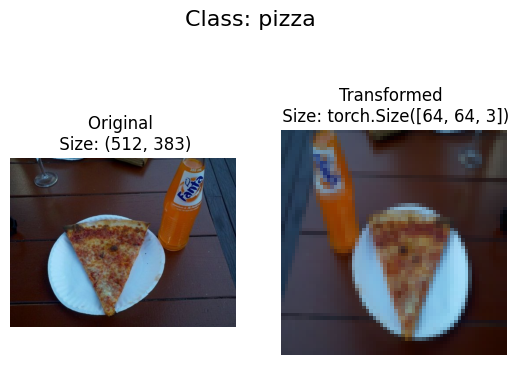

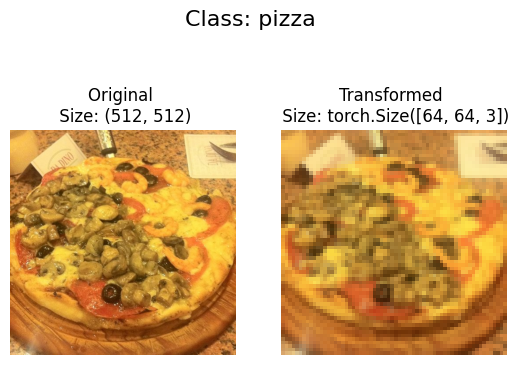

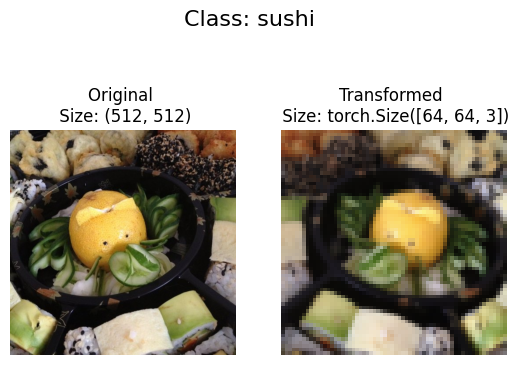

In [10]:
# Write a function to plot transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(42)
    random_image_path=random.sample(image_path_list, k=n)
    for image_path in random_image_path:
      with Image.open(image_path) as f:
        fig, ax = plt.subplots(1, 2)
        ax[0].imshow(f)
        ax[0].set_title(f"Original \n Size: {f.size}")
        ax[0].axis(False)

        # Transform Image and plot
        transformed_image=transform(f).permute(1,2,0)
        print(transformed_image.shape)
        ax[1].imshow(transformed_image)
        ax[1].set_title(f"Transformed \n Size: {transformed_image.shape}")
        ax[1].axis(False)

        fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

### Load image data using `ImageFolder`

In [11]:
# Use ImageFolder to create dataset(s)
train_data=datasets.ImageFolder(training_path, transform=data_transform, target_transform=None)
test_data=datasets.ImageFolder(testing_path, transform=data_transform)

print(train_data)

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [12]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [13]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [14]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [28]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader

train_dataloader=DataLoader(dataset=train_data, batch_size=4, num_workers=1, shuffle=True)
test_dataloader=DataLoader(dataset=test_data, batch_size=4, num_workers=1, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ad5b3835310>,
 <torch.utils.data.dataloader.DataLoader at 0x7ad5b38373d0>)

In [30]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)
batch_example=next(iter(train_dataloader))
print(batch_example[1])

tensor([2, 0, 0, 0])


## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [17]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

## 4. Create training and testing functions for `model_0`.

In [45]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X,y) in enumerate(train_dataloader):
    # Send data to target device
    X, y=X.to(device), y.to(device)
    # 1. Forward pass
    y_pred=model(X)

    # 2. Calculate and accumulate loss
    loss=loss_fn(y_pred, y)
    train_loss+=loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumulate accuracy metric across all batches
    y_pred_class=torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc+=(y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss/=len(train_dataloader)
  train_acc/=len(train_dataloader)
  return train_loss, train_acc

In [46]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X,y) in enumerate(test_dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred=model(X)

      # 2. Calculate and accumulate loss
      loss=loss_fn(y_pred, y)
      test_loss+=loss.item()

      # Calculate and accumulate accuracy
      y_pred_class=torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      test_acc+=(y_pred_class == y).sum().item()/len(y_pred)
  # Adjust metrics to get average loss and accuracy per batch
  test_loss/=len(test_dataloader)
  test_acc/=len(test_dataloader)
  return test_loss, test_acc

In [34]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [47]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)
model_0=model_0.to(device)

results = train(model_0, train_dataloader, test_dataloader, optimizer, loss_fn, 5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8970 | train_acc: 0.5482 | test_loss: 1.0034 | test_acc: 0.4649
Epoch: 2 | train_loss: 0.8525 | train_acc: 0.6272 | test_loss: 1.0986 | test_acc: 0.3684
Epoch: 3 | train_loss: 0.8191 | train_acc: 0.6184 | test_loss: 0.9941 | test_acc: 0.4649
Epoch: 4 | train_loss: 0.8065 | train_acc: 0.6316 | test_loss: 1.0348 | test_acc: 0.4254
Epoch: 5 | train_loss: 0.7638 | train_acc: 0.6491 | test_loss: 1.0165 | test_acc: 0.3860


In [56]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)

results = train(model_0, train_dataloader, test_dataloader, optimizer, loss_fn, 20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0109 | train_acc: 0.9956 | test_loss: 7.1043 | test_acc: 0.5482
Epoch: 2 | train_loss: 0.1241 | train_acc: 0.9737 | test_loss: 5.7453 | test_acc: 0.6009
Epoch: 3 | train_loss: 0.0066 | train_acc: 0.9956 | test_loss: 5.8386 | test_acc: 0.6009
Epoch: 4 | train_loss: 0.0082 | train_acc: 0.9956 | test_loss: 5.3442 | test_acc: 0.5219
Epoch: 5 | train_loss: 0.0083 | train_acc: 1.0000 | test_loss: 6.0584 | test_acc: 0.5482
Epoch: 6 | train_loss: 0.0150 | train_acc: 0.9956 | test_loss: 6.4582 | test_acc: 0.5746
Epoch: 7 | train_loss: 0.0659 | train_acc: 0.9737 | test_loss: 5.5537 | test_acc: 0.4956
Epoch: 8 | train_loss: 0.2498 | train_acc: 0.9518 | test_loss: 5.4160 | test_acc: 0.5439
Epoch: 9 | train_loss: 0.1259 | train_acc: 0.9386 | test_loss: 5.7106 | test_acc: 0.5219
Epoch: 10 | train_loss: 0.0615 | train_acc: 0.9737 | test_loss: 4.2223 | test_acc: 0.4912
Epoch: 11 | train_loss: 0.0111 | train_acc: 1.0000 | test_loss: 4.6897 | test_acc: 0.5044
Epoch: 12 | train_l

In [55]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)
results = train(model_0, train_dataloader, test_dataloader, optimizer, loss_fn, 50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0345 | train_acc: 0.9912 | test_loss: 5.6158 | test_acc: 0.5482
Epoch: 2 | train_loss: 0.0062 | train_acc: 1.0000 | test_loss: 5.5926 | test_acc: 0.5877
Epoch: 3 | train_loss: 0.0012 | train_acc: 1.0000 | test_loss: 5.5319 | test_acc: 0.6140
Epoch: 4 | train_loss: 0.0005 | train_acc: 1.0000 | test_loss: 5.4952 | test_acc: 0.5746
Epoch: 5 | train_loss: 0.0004 | train_acc: 1.0000 | test_loss: 6.4813 | test_acc: 0.5351
Epoch: 6 | train_loss: 0.0003 | train_acc: 1.0000 | test_loss: 5.7047 | test_acc: 0.5877
Epoch: 7 | train_loss: 0.0002 | train_acc: 1.0000 | test_loss: 6.0317 | test_acc: 0.5351
Epoch: 8 | train_loss: 0.0002 | train_acc: 1.0000 | test_loss: 6.2338 | test_acc: 0.5614
Epoch: 9 | train_loss: 0.0006 | train_acc: 1.0000 | test_loss: 6.5903 | test_acc: 0.5614
Epoch: 10 | train_loss: 0.0002 | train_acc: 1.0000 | test_loss: 5.8052 | test_acc: 0.6009
Epoch: 11 | train_loss: 0.0002 | train_acc: 1.0000 | test_loss: 6.6560 | test_acc: 0.5219
Epoch: 12 | train_l

KeyboardInterrupt: 

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

In [52]:
print(results.keys())

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])


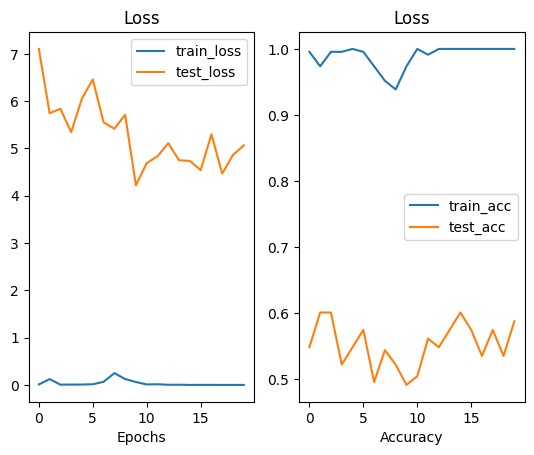

In [57]:
from typing import Tuple, Dict, List
def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a results dictionary.

  Args:
      results (dict): dictionary containing list of values, e.g.
          {"train_loss": [...],
            "train_acc": [...],
            "test_loss": [...],
            "test_acc": [...]}
  """
  loss = results['train_loss']
  test_loss = results['test_loss']

  accuracy = results['train_acc']
  test_accuracy = results['test_acc']

  epochs = range(len(results["train_loss"]))

  plt.figure()

  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label="train_acc")
  plt.plot(epochs, test_accuracy, label="test_acc")
  plt.title('Loss')
  plt.xlabel('Accuracy')
  plt.legend()


plot_loss_curves(results)

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [58]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_0_double_units=TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=20,
                  output_shape=len(train_data.classes)).to(device)

optimizer_2 = torch.optim.Adam(model_0_double_units.parameters(),
                             lr=0.001)

results_model_double_units=train(model_0_double_units, train_dataloader, test_dataloader, optimizer_2, loss_fn, 20)


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1014 | train_acc: 0.3772 | test_loss: 1.0897 | test_acc: 0.3158
Epoch: 2 | train_loss: 0.9772 | train_acc: 0.5219 | test_loss: 1.0743 | test_acc: 0.3816
Epoch: 3 | train_loss: 0.8811 | train_acc: 0.5965 | test_loss: 0.9957 | test_acc: 0.4781
Epoch: 4 | train_loss: 0.9093 | train_acc: 0.6053 | test_loss: 1.0211 | test_acc: 0.5439
Epoch: 5 | train_loss: 0.9151 | train_acc: 0.5526 | test_loss: 0.9955 | test_acc: 0.4605
Epoch: 6 | train_loss: 0.8238 | train_acc: 0.6053 | test_loss: 0.9873 | test_acc: 0.4912
Epoch: 7 | train_loss: 0.8095 | train_acc: 0.6711 | test_loss: 1.0135 | test_acc: 0.5395
Epoch: 8 | train_loss: 0.7601 | train_acc: 0.6360 | test_loss: 1.0431 | test_acc: 0.4781
Epoch: 9 | train_loss: 0.7590 | train_acc: 0.6447 | test_loss: 1.0987 | test_acc: 0.4123
Epoch: 10 | train_loss: 0.7075 | train_acc: 0.7193 | test_loss: 1.0674 | test_acc: 0.4649
Epoch: 11 | train_loss: 0.6877 | train_acc: 0.7105 | test_loss: 1.1099 | test_acc: 0.4649
Epoch: 12 | train_l

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

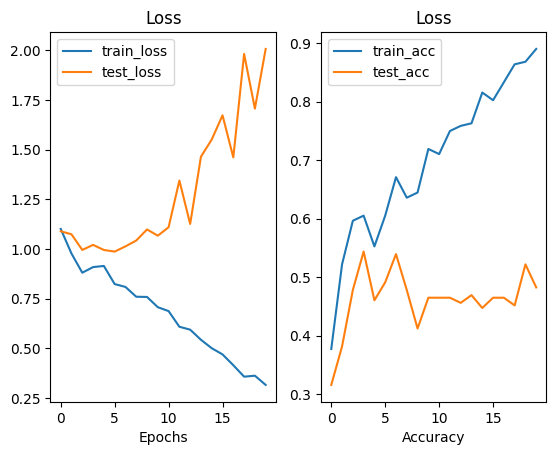

In [59]:
plot_loss_curves(results_model_double_units)

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [60]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [61]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.


Excellent, we now have double the training and testing images...

In [62]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [64]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create datasets
train_data_2=ImageFolder(train_data_20_percent_path, simple_transform, target_transform=None)
test_data_2=ImageFolder(test_data_20_percent_path, simple_transform)

# Create dataloaders
BATCH_SIZE=4
train_dataloader_2=DataLoader(train_data_2, BATCH_SIZE, shuffle=True)
test_dataloader_2=DataLoader(test_data_2, BATCH_SIZE, shuffle=False)

In [65]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

results_increased_data=train(model_0, train_dataloader_2, test_dataloader_2, optimizer, loss_fn, 20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0005 | train_acc: 1.0000 | test_loss: 5.0489 | test_acc: 0.5219
Epoch: 2 | train_loss: 0.0007 | train_acc: 1.0000 | test_loss: 4.8274 | test_acc: 0.5614
Epoch: 3 | train_loss: 0.0006 | train_acc: 1.0000 | test_loss: 4.9353 | test_acc: 0.5746
Epoch: 4 | train_loss: 0.0006 | train_acc: 1.0000 | test_loss: 4.8478 | test_acc: 0.5614
Epoch: 5 | train_loss: 0.0004 | train_acc: 1.0000 | test_loss: 5.6072 | test_acc: 0.5482
Epoch: 6 | train_loss: 0.0006 | train_acc: 1.0000 | test_loss: 5.1192 | test_acc: 0.5614
Epoch: 7 | train_loss: 0.0004 | train_acc: 1.0000 | test_loss: 5.2614 | test_acc: 0.4956
Epoch: 8 | train_loss: 0.0003 | train_acc: 1.0000 | test_loss: 5.5013 | test_acc: 0.5351
Epoch: 9 | train_loss: 0.0005 | train_acc: 1.0000 | test_loss: 5.6259 | test_acc: 0.6009
Epoch: 10 | train_loss: 0.0004 | train_acc: 1.0000 | test_loss: 4.9457 | test_acc: 0.5746
Epoch: 11 | train_loss: 0.0004 | train_acc: 1.0000 | test_loss: 5.4432 | test_acc: 0.5088
Epoch: 12 | train_l

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
* Does the model you trained in exercise 7 get it right?
* If not, what do you think you could do to improve it?